In [1]:
#Task 1: Data Cleaning and Preparation

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("/content/Amazon.csv")

In [4]:
print(df.head)

<bound method NDFrame.head of                            Timestamp  age             Gender  \
0     2023/06/08 7:50:55 PM GMT+5:30   65  Prefer not to say   
1     2023/06/09 9:37:44 AM GMT+5:30   20               Male   
2    2023/06/11 11:26:54 PM GMT+5:30   42               Male   
3     2023/06/08 5:17:10 PM GMT+5:30   65             Others   
4    2023/06/11 10:59:30 PM GMT+5:30   45             Female   
..                               ...  ...                ...   
795   2023/06/07 6:15:10 PM GMT+5:30   26               Male   
796  2023/06/11 11:25:48 PM GMT+5:30   61             Others   
797  2023/06/07 10:21:00 PM GMT+5:30   67             Female   
798   2023/06/10 2:40:34 PM GMT+5:30   19             Others   
799   2023/06/05 8:49:12 PM GMT+5:30   10             Others   

         Purchase_Frequency  \
0    Less than once a month   
1               Once a week   
2               Once a week   
3              Once a month   
4               Once a week   
..             

In [5]:
# Remove duplicate or inconsistent survey responses.

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
#Standardize categorical entries (e.g., frequency levels, gender, recommendation responses).

In [8]:
if "Gender" in df.columns:
    df["Gender"] = df["Gender"].str.strip().str.lower()
    df["Gender"] = df["Gender"].replace({"m": "male", "f": "female","male ": "male", "female ": "female"})


print(df["Gender"])

0      prefer not to say
1                   male
2                   male
3                 others
4                 female
             ...        
795                 male
796               others
797               female
798               others
799               others
Name: Gender, Length: 800, dtype: object


In [9]:
freq_cols = ["Purchase_Frequency", "Shopping_Frequency"]
for col in freq_cols:
    if col in df.columns:
        df[col] = df[col].str.strip().str.lower()

existing_freq_cols = [col for col in freq_cols if col in df.columns]
df[existing_freq_cols].head()

,Purchase_Frequency
0,less than once a month
1,once a week
2,once a week
3,once a month
4,once a week


In [10]:
rec_cols = ["Recommendation", "Will_Recommend"]
for col in rec_cols:
    if col in df.columns:
        df[col] = df[col].str.strip().str.lower()
        df[col] = df[col].replace({"yes": "yes", "no": "no","y": "yes", "n": "no"})

In [11]:
existing_rec_cols = [c for c in rec_cols if c in df.columns]
if existing_rec_cols:
    print(df[existing_rec_cols])
else:
    print("None of the specified recommendation columns found in DataFrame.")

None of the specified recommendation columns found in DataFrame.


In [12]:
#Handle missing values and inconsistent formats in Product_Search_Method and other fields.

In [13]:
if "Product_Search_Method" in df.columns:
    df["Product_Search_Method"] = (
        df["Product_Search_Method"].astype(str).str.strip().str.lower().replace({"nan": None, "": None, "-": None}))


for col in df.select_dtypes(include="object"):
    df[col] = df[col].fillna(df[col].mode()[0])


for col in df.select_dtypes(include=["int64", "float64"]):
    df[col] = df[col].fillna(df[col].median())


In [14]:
print(df[col])

0      778242
1      193482
2      925975
3      566872
4      683642
        ...  
795    814116
796    652510
797    460379
798    745775
799    677385
Name: transaction, Length: 800, dtype: int64


In [15]:
#Rename duplicate or misformatted columns (e.g., remove trailing spaces in Rating_Accuracy )

In [16]:
df.columns = df.columns.str.strip().str.replace(" ", "_")

In [17]:
print(df.columns)

Index(['Timestamp', 'age', 'Gender', 'Purchase_Frequency',
       'Purchase_Categories', 'Personalized_Recommendation_Frequency',
       'Browsing_Frequency', 'Product_Search_Method',
       'Search_Result_Exploration', 'Customer_Reviews_Importance',
       'Add_to_Cart_Browsing', 'Cart_Completion_Frequency',
       'Cart_Abandonment_Factors', 'Saveforlater_Frequency', 'Review_Left',
       'Review_Reliability', 'Review_Helpfulness',
       'Personalized_Recommendation_Frequency', 'Recommendation_Helpfulness',
       'Rating_Accuracy', 'Shopping_Satisfaction', 'Service_Appreciation',
       'Improvement_Areas', 'transaction'],
      dtype='object')


In [18]:
df.rename(columns={"Rating_Accuracy ": "Rating_Accuracy",}, inplace=True)
print(df.rename)

<bound method DataFrame.rename of                            Timestamp  age             Gender  \
0     2023/06/08 7:50:55 PM GMT+5:30   65  prefer not to say   
1     2023/06/09 9:37:44 AM GMT+5:30   20               male   
2    2023/06/11 11:26:54 PM GMT+5:30   42               male   
3     2023/06/08 5:17:10 PM GMT+5:30   65             others   
4    2023/06/11 10:59:30 PM GMT+5:30   45             female   
..                               ...  ...                ...   
795   2023/06/07 6:15:10 PM GMT+5:30   26               male   
796  2023/06/11 11:25:48 PM GMT+5:30   61             others   
797  2023/06/07 10:21:00 PM GMT+5:30   67             female   
798   2023/06/10 2:40:34 PM GMT+5:30   19             others   
799   2023/06/05 8:49:12 PM GMT+5:30   10             others   

         Purchase_Frequency  \
0    less than once a month   
1               once a week   
2               once a week   
3              once a month   
4               once a week   
..         

In [19]:
#Convert numerical rating columns (e.g., Customer_Reviews_Importance, Shopping_Satisfaction) to appropriate numeric types for analysis.

In [20]:
rating_columns = ["Customer_Reviews_Importance","Shopping_Satisfaction","Rating_Accuracy","Service_Rating","Product_Rating"]
for col in rating_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")
        df[col] = df[col].fillna(df[col].median())

In [21]:
print("Cleaned Dataset")
df.head()

Cleaned Dataset


,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas,transaction
0,2023/06/08 7:50:55 PM GMT+5:30,65,prefer not to say,less than once a month,Clothing and Fashion,Yes,Multiple times a day,keyword,Multiple pages,2,...,Yes,Moderately,No,2,Sometimes,4,4,Competitive prices,better app interface and lower shipping charges,778242
1,2023/06/09 9:37:44 AM GMT+5:30,20,male,once a week,Groceries and Gourmet Food;Beauty and Personal...,No,Rarely,filter,First page,3,...,Yes,Heavily,Yes,1,Sometimes,4,5,Quick delivery,Scrolling option would be much better than goi...,193482
2,2023/06/11 11:26:54 PM GMT+5:30,42,male,once a week,Groceries and Gourmet Food;Beauty and Personal...,Sometimes,Few times a week,keyword,Multiple pages,2,...,Yes,Heavily,Sometimes,5,No,5,3,All the above,Nil,925975
3,2023/06/08 5:17:10 PM GMT+5:30,65,others,once a month,Beauty and Personal Care;Clothing and Fashion;...,No,Few times a month,filter,Multiple pages,2,...,Yes,Occasionally,No,3,Yes,1,2,Quick delivery,Quality of product is very poor according to t...,566872
4,2023/06/11 10:59:30 PM GMT+5:30,45,female,once a week,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,keyword,First page,5,...,Yes,Rarely,No,2,Yes,1,2,Quick delivery,Irrelevant product suggestions,683642


In [22]:
#Task 2: Descriptive Behavior Analysis

In [23]:
#Summarize customer demographics (age, gender distribution).

In [24]:
age_summary = df['age'].describe().to_frame(name='Age')
print("Age Summary Statistics")
print(age_summary)

Age Summary Statistics
              Age
count  800.000000
mean    35.170000
std     18.916485
min      3.000000
25%     19.000000
50%     35.500000
75%     51.000000
max     67.000000


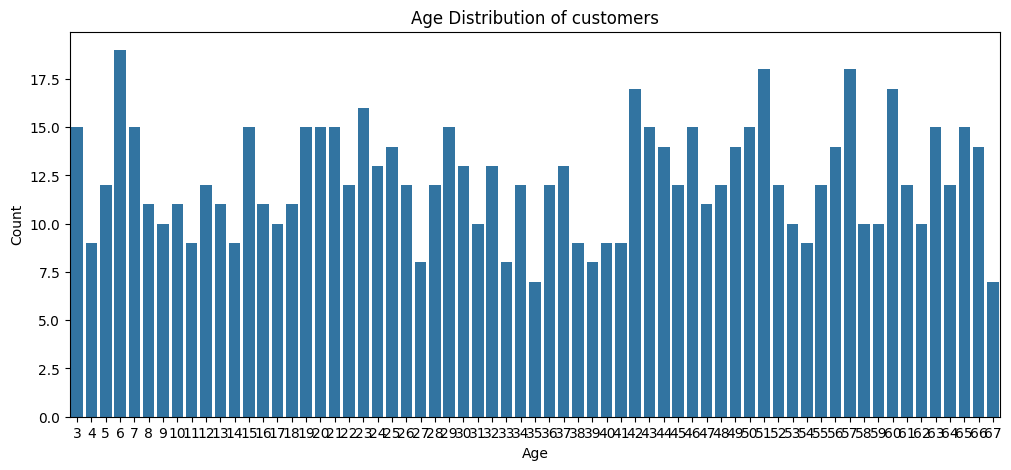

In [25]:
age_groups = df['age'].value_counts().sort_index()

plt.figure(figsize=(12, 5))
sns.barplot(x=age_groups.index, y=age_groups.values)
plt.title('Age Distribution of customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()




In [26]:
gender_counts = df['Gender'].value_counts(normalize=True).mul(100).round(2).to_frame(name='Percentage')
print("Gender Distribution")
print(gender_counts)

Gender Distribution
                   Percentage
Gender                       
male                    26.12
others                  25.25
female                  24.62
prefer not to say       24.00


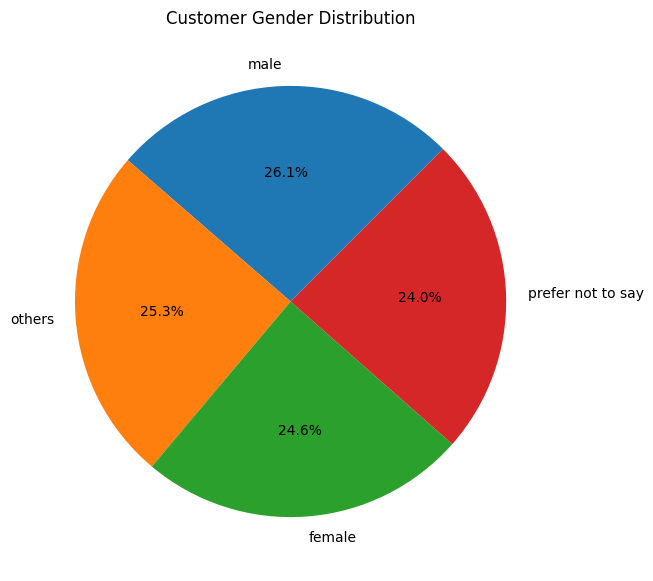

In [27]:
plt.figure(figsize=(7, 7))
gender_counts['Percentage'].plot(kind='pie', autopct='%1.1f%%', startangle=45)
plt.title('Customer Gender Distribution')
plt.ylabel('')
plt.show()

In [28]:
#Analyze overall purchase frequency and most popular product categories.

In [29]:
purchase_freq = df['Purchase_Frequency'].value_counts(normalize=True) * 100
purchase_freq = purchase_freq.round(2).to_frame('Percentage')

print("Purchase Frequency Distribution")
print(purchase_freq)


Purchase Frequency Distribution
                        Percentage
Purchase_Frequency                
once a month                 21.00
multiple times a week        19.88
once a week                  19.88
few times a month            19.75
less than once a month       19.50


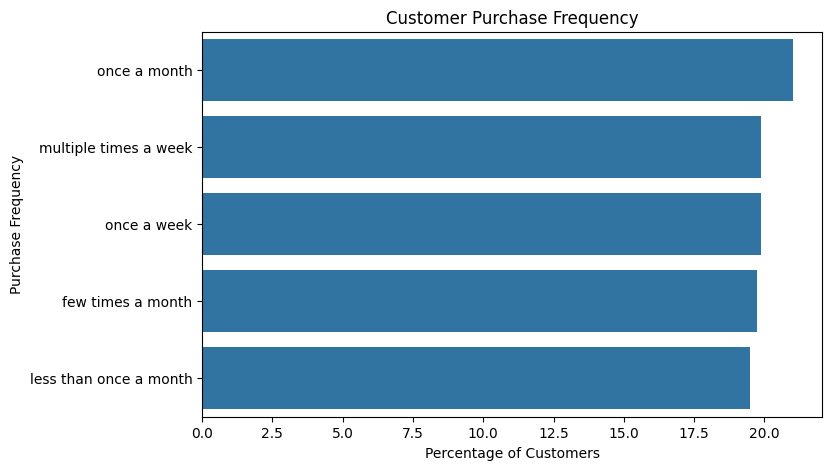

In [30]:
plt.figure(figsize=(8, 5))
sns.barplot(y=purchase_freq.index, x='Percentage', data=purchase_freq.reset_index())
plt.title('Customer Purchase Frequency')
plt.xlabel('Percentage of Customers')
plt.ylabel('Purchase Frequency')
plt.show()



In [31]:
category_series = df['Purchase_Categories'].str.split(';').explode().str.strip()
top_categories = category_series.value_counts().head(10)
print("Top 10 Most Popular Product Categories")
print(top_categories.to_frame(name='Count'))

Top 10 Most Popular Product Categories
                            Count
Purchase_Categories              
Clothing and Fashion          450
others                        412
Home and Kitchen              391
Beauty and Personal Care      383
Groceries and Gourmet Food    369


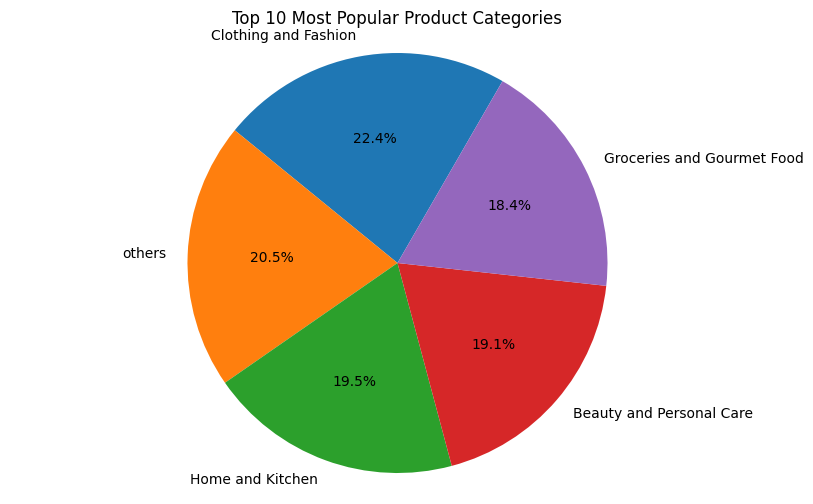

In [32]:
plt.figure(figsize=(10, 6))
plt.pie(top_categories.values,labels=top_categories.index,autopct='%1.1f%%',startangle=60)
plt.title('Top 10 Most Popular Product Categories')
plt.axis('equal')
plt.show()


In [33]:
search_method = df['Product_Search_Method'].value_counts(normalize=True).mul(100).round(2).to_frame(name='Percentage')
print("Top Product Search Methods")
print(search_method)

Top Product Search Methods
                       Percentage
Product_Search_Method            
keyword                     40.88
categories                  20.38
filter                      20.12
others                      18.62


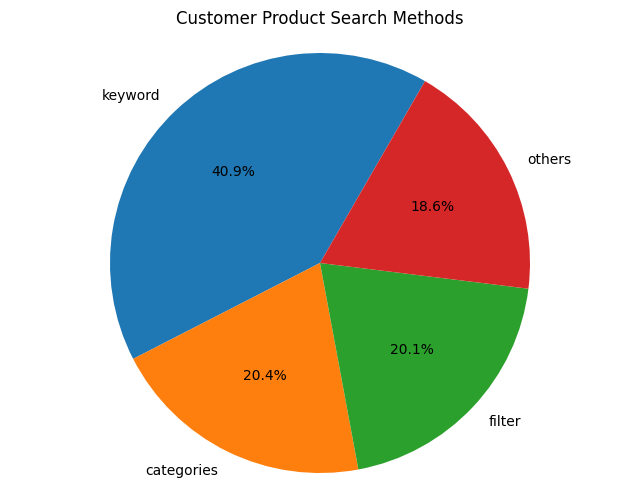

In [34]:
plt.figure(figsize=(8, 6))
plt.pie(search_method['Percentage'],labels=search_method.index,autopct='%1.1f%%',startangle=60)
plt.title('Customer Product Search Methods')
plt.axis('equal')
plt.show()


In [35]:
#Identify top browsing methods and most common cart abandonment factors.

In [36]:
abandonment_series = df['Cart_Abandonment_Factors'].str.split(',').explode().str.strip()
top_abandonment_factors = abandonment_series.value_counts().head(10)
print("Top Cart Abandonment Factors")
print(top_abandonment_factors.to_frame(name='Count'))

Top Cart Abandonment Factors
                                            Count
Cart_Abandonment_Factors                         
High shipping costs                           224
Found a better price elsewhere                206
Changed my mind or no longer need the item    194
others                                        176


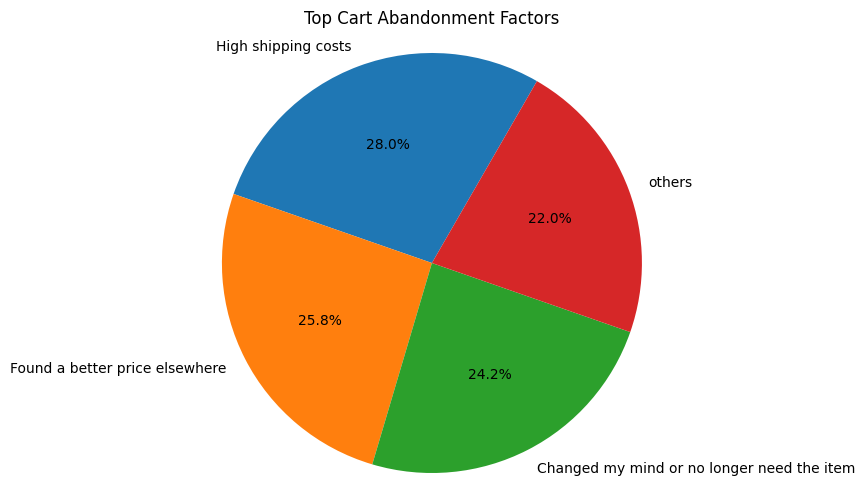

In [37]:
plt.figure(figsize=(10, 6))
plt.pie(top_abandonment_factors.values,labels=top_abandonment_factors.index,autopct='%1.1f%%',startangle=60)
plt.title('Top Cart Abandonment Factors')
plt.axis('equal')
plt.show()


In [38]:
#Calculate mean and median satisfaction, recommendation helpfulness, and rating accuracy.

In [39]:
metrics_cols = ['Shopping_Satisfaction', 'Rating_Accuracy']
metrics_summary = df[metrics_cols].agg(['mean', 'median', 'std', 'min', 'max']).round(2)

print("Mean and Median of Key Metrics")
print(metrics_summary)

Mean and Median of Key Metrics
        Shopping_Satisfaction  Rating_Accuracy
mean                     3.01             2.97
median                   3.00             3.00
std                      1.41             1.40
min                      1.00             1.00
max                      5.00             5.00


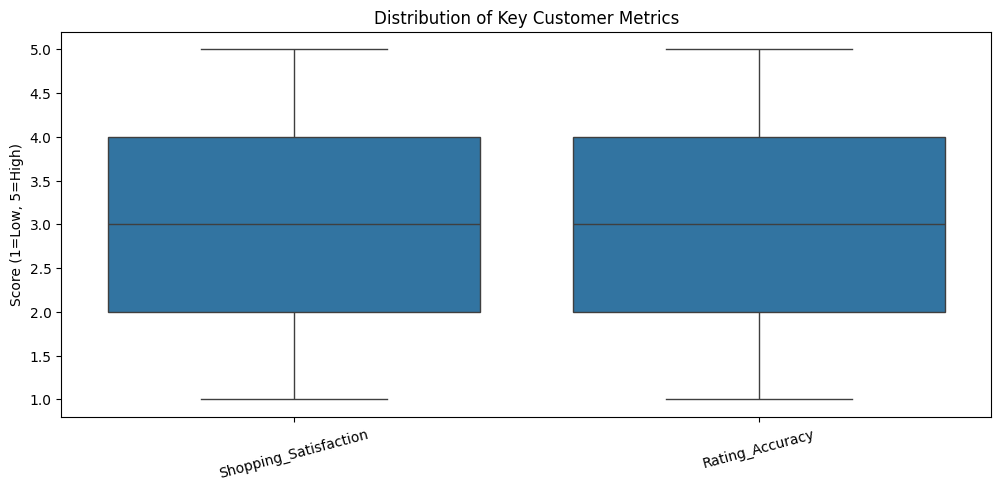

In [40]:
plt.figure(figsize=(12, 5))
metrics_plot_df = df[metrics_cols].melt(var_name='Metric', value_name='Score')
sns.boxplot(x='Metric', y='Score', data=metrics_plot_df)
plt.title('Distribution of Key Customer Metrics')
plt.ylabel('Score (1=Low, 5=High)')
plt.xlabel('')
plt.xticks(rotation=15)
plt.show()



In [41]:
#Generate summary statistics and visualizations for key behavioral variables.

,age,Customer_Reviews_Importance,Personalized_Recommendation_Frequency,Rating_Accuracy,Shopping_Satisfaction,transaction
count,800.000000,800.000000,800.000000,800.000000,800.00000,800.000000
mean,35.170000,3.058750,2.952500,2.968750,3.01250,556906.991250
std,18.916485,1.408111,1.420481,1.403651,1.40706,261823.943299
min,3.000000,1.000000,1.000000,1.000000,1.00000,101391.000000
25%,19.000000,2.000000,2.000000,2.000000,2.00000,332074.750000
50%,35.500000,3.000000,3.000000,3.000000,3.00000,563278.500000
75%,51.000000,4.000000,4.000000,4.000000,4.00000,780725.250000
max,67.000000,5.000000,5.000000,5.000000,5.00000,999892.000000


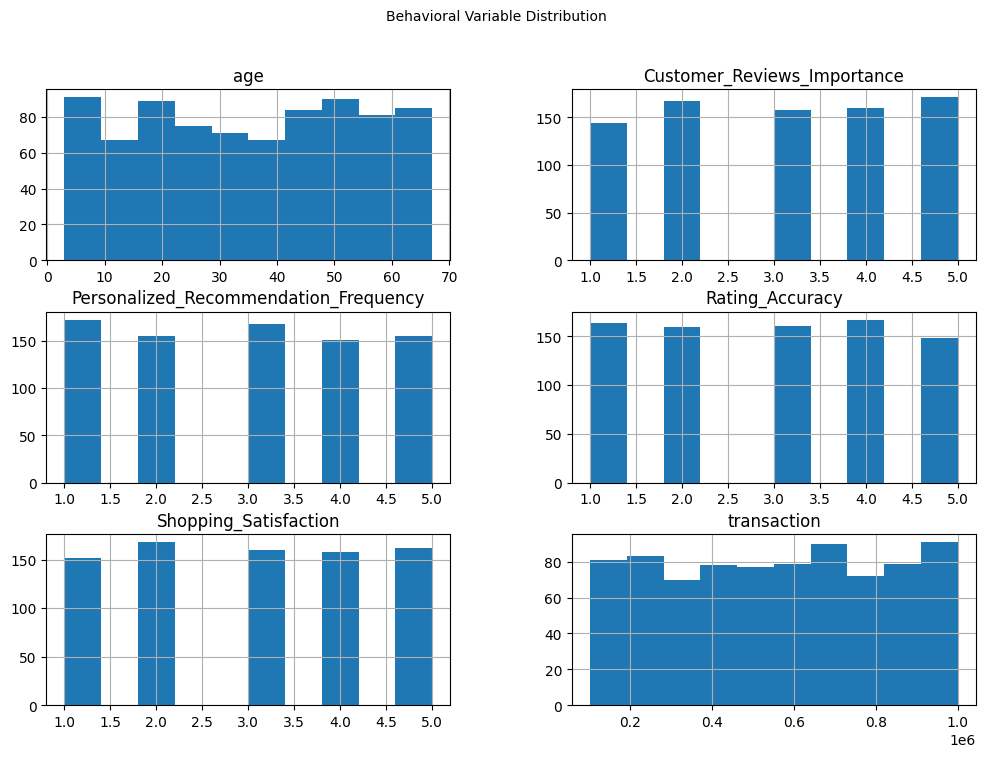

In [42]:
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns
display(df[numeric_cols].describe())
df[numeric_cols].hist(figsize=(12,8))
plt.suptitle("Behavioral Variable Distribution", fontsize=10)
plt.show()

In [43]:
#Task 3: Customer Segmentation and Profiling

In [44]:
#Segment customers based on purchase frequency and shopping satisfaction levels.

In [45]:
required_cols = ["Purchase_Frequency", "Shopping_Satisfaction"]
for col in required_cols:
    if col not in df.columns:
        raise ValueError(f"Missing required column: {col}")

df["Shopping_Satisfaction"] = pd.to_numeric(df["Shopping_Satisfaction"], errors="coerce")
df["Purchase_Frequency"] = df["Purchase_Frequency"].astype(str).str.lower().replace({"less than once a month": 1,"once a month": 2,
    "few times a month": 3,"once a week": 4,"multiple times a week": 5})

df["Purchase_Frequency"] = pd.to_numeric(df["Purchase_Frequency"], errors="coerce")

/tmp/ipython-input-635189067.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Purchase_Frequency"] = df["Purchase_Frequency"].astype(str).str.lower().replace({"less than once a month": 1,"once a month": 2,


In [46]:

print(df["Purchase_Frequency"])

0      1
1      4
2      4
3      2
4      4
      ..
795    2
796    5
797    4
798    3
799    2
Name: Purchase_Frequency, Length: 800, dtype: int64


In [47]:
#Create profiles such as:
#Frequent Buyers: High purchase frequency, high satisfaction.
# Occasional Shoppers: Medium frequency, moderate satisfaction.
# At-Risk Customers: Low satisfaction or frequent cart abandonment.

In [48]:
def segment_customer(row):
    if row["Purchase_Frequency"] >= 3 and row["Shopping_Satisfaction"] >= 4:
        return "Frequent Buyer"
    elif row["Purchase_Frequency"] == 2:
        return "Occasional Shopper"
    elif row["Shopping_Satisfaction"] <= 2:
        return "At-Risk Customer"
    else:
        return "General Customer"

df["Customer_Segment"] = df.apply(segment_customer, axis=1)
print(df["Customer_Segment"].value_counts())

Customer_Segment
At-Risk Customer      249
General Customer      198
Frequent Buyer        185
Occasional Shopper    168
Name: count, dtype: int64


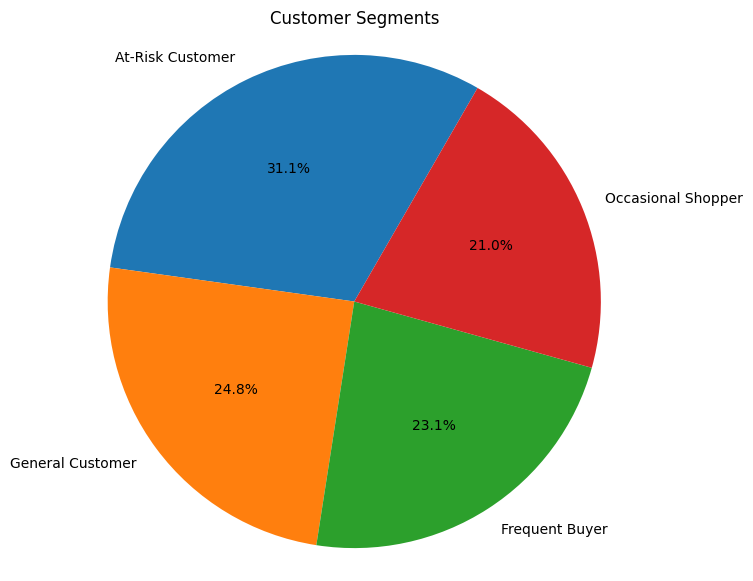

In [49]:
plt.figure(figsize=(7, 7))
segment_counts = df["Customer_Segment"].value_counts()
plt.pie(segment_counts.values,labels=segment_counts.index,autopct='%1.1f%%',startangle=60)
plt.title("Customer Segments")
plt.axis("equal")
plt.show()


In [50]:
#Analyze demographic or behavioral differences across these segments.

In [51]:
segment_stats = df.groupby('Customer_Segment').agg(Mean_Age=('age', 'mean'),Median_Satisfaction=('Shopping_Satisfaction', 'median'),
    Count=('age', 'size')).round(1)
print(segment_stats)

                    Mean_Age  Median_Satisfaction  Count
Customer_Segment                                        
At-Risk Customer        36.4                  2.0    249
Frequent Buyer          33.7                  4.0    185
General Customer        35.0                  3.0    198
Occasional Shopper      35.3                  3.0    168


In [52]:
gender_by_segment = pd.crosstab(df['Customer_Segment'], df['Gender'], normalize='index').mul(100).round(1)
print(gender_by_segment)
at_risk_df = df[df['Customer_Segment'] == 'At-Risk Customers'].copy()
if not at_risk_df.empty:
    abandonment_series_at_risk = at_risk_df['Cart_Abandonment_Factors'].str.split(',').explode().str.strip()
    top_abandonment_at_risk = abandonment_series_at_risk.value_counts().head(5)
    print(top_abandonment_at_risk)

Gender              female  male  others  prefer not to say
Customer_Segment                                           
At-Risk Customer      21.7  28.1    23.3               26.9
Frequent Buyer        23.2  27.0    25.4               24.3
General Customer      27.3  23.7    26.8               22.2
Occasional Shopper    27.4  25.0    26.2               21.4


/tmp/ipython-input-560286002.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Customer_Segment', y='Shopping_Satisfaction', data=df, order=segment_order, palette='Purples')


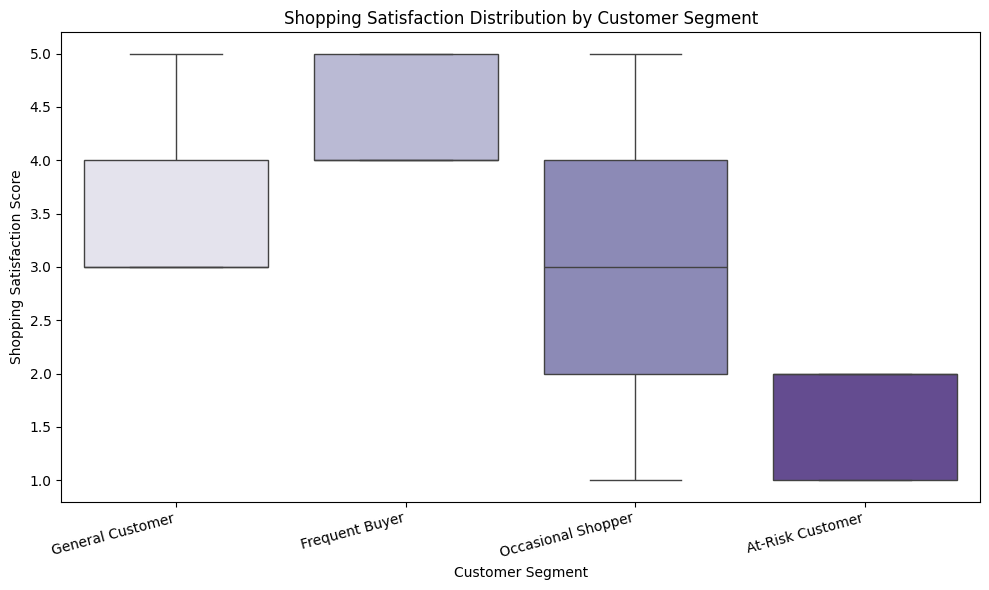

In [53]:
plt.figure(figsize=(10, 6))
segment_order = df['Customer_Segment'].unique().tolist()
sns.boxplot(x='Customer_Segment', y='Shopping_Satisfaction', data=df, order=segment_order, palette='Purples')
plt.title('Shopping Satisfaction Distribution by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Shopping Satisfaction Score')
plt.xticks(rotation=15, ha='right')
plt.tight_layout()

Gender,female,male,others,prefer not to say
Customer_Segment,,,,
At-Risk Customer,54,70,58,67
Frequent Buyer,43,50,47,45
General Customer,54,47,53,44
Occasional Shopper,46,42,44,36


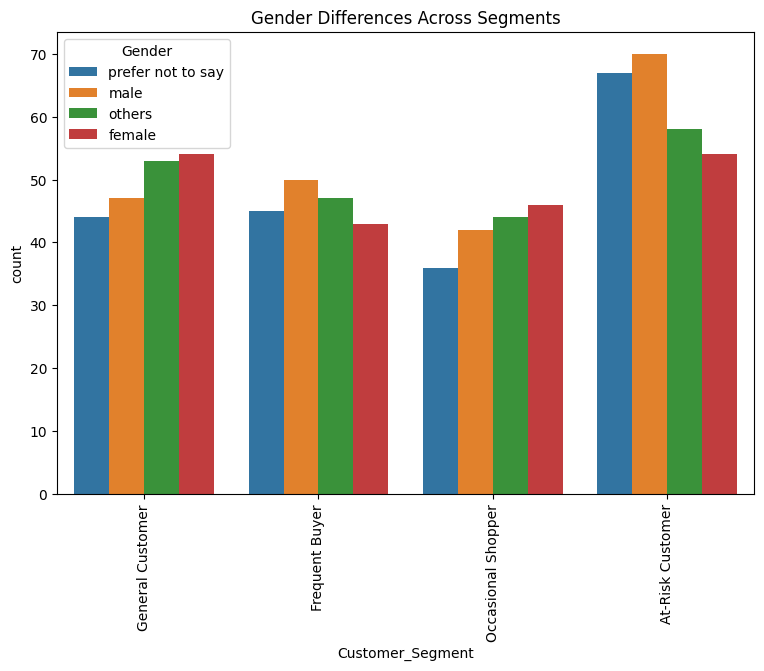

In [54]:
display(pd.crosstab(df["Customer_Segment"], df["Gender"]))
plt.figure(figsize=(9,6))
sns.countplot(x="Customer_Segment", hue="Gender", data=df)
plt.title("Gender Differences Across Segments")
plt.xticks(rotation=90)
plt.show()

/tmp/ipython-input-1539620497.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Customer_Segment", y="age", data=df,palette='Reds')


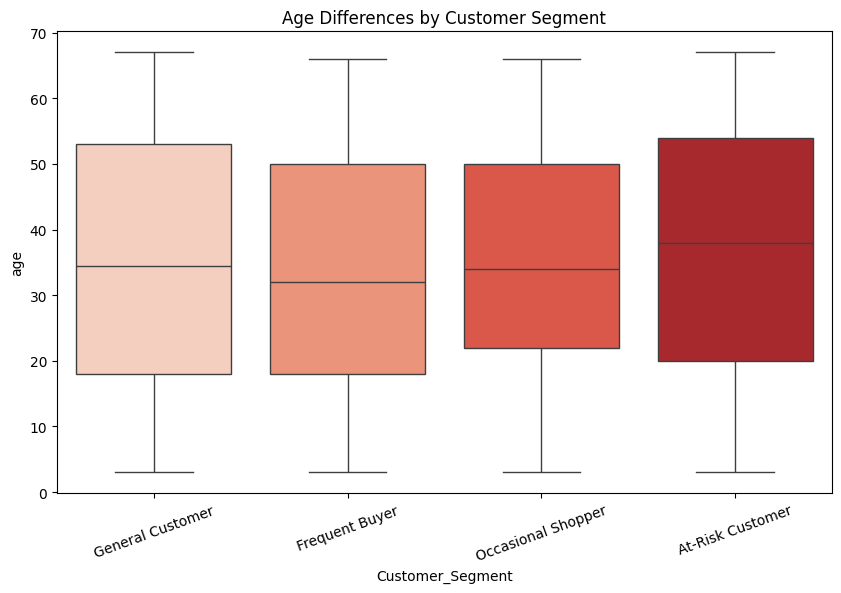

In [55]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Customer_Segment", y="age", data=df,palette='Reds')
plt.title("Age Differences by Customer Segment")
plt.xticks(rotation=20)
plt.show()

In [56]:
#Use clustering (e.g., K-Means) for behavioral grouping based on survey responses.

In [57]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [58]:
behavioral_features = ["Shopping_Satisfaction","Customer_Reviews_Importance","Rating_Accuracy","Service_Rating","Purchase_Frequency"]

kmeans_elbow_method
K-Means Clustering performed with K=4.
Cluster sizes:
Cluster
0.0    218
1.0    203
3.0    195
2.0    184
Name: count, dtype: int64
K-Means Cluster Profiles
           age  Shopping_Satisfaction  Recommendation_Helpfulness  \
Cluster                                                             
0.0      49.89                   3.06                        0.16   
1.0      27.93                   3.08                        0.83   
2.0      45.23                   2.92                        0.85   
3.0      16.76                   2.97                        0.23   

         Rating_Accuracy  Most_Common_Frequency Most_Common_Gender  
Cluster                                                             
0.0                 2.45                      3             female  
1.0                 1.63                      5             others  
2.0                 4.22                      2             female  
3.0                 3.76                      1               m

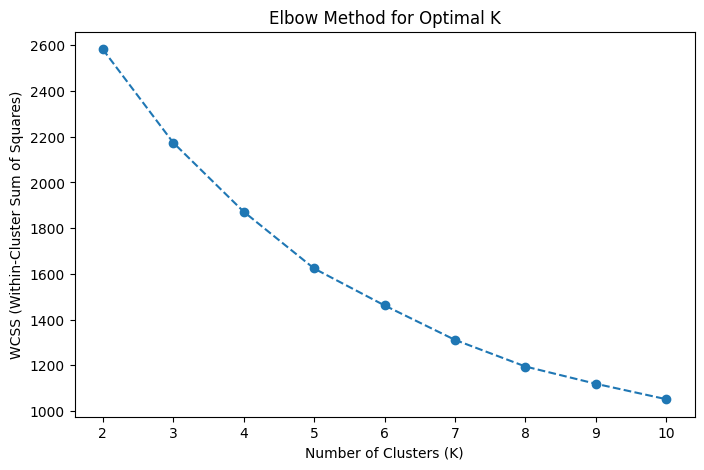

In [59]:
selected_cluster_features_names = ['age','Shopping_Satisfaction','Recommendation_Helpfulness','Rating_Accuracy']

if 'Recommendation_Helpfulness' in df.columns:
    mapping = {"yes": 1, "sometimes": 0.5, "no": 0}
    df['Recommendation_Helpfulness'] = df['Recommendation_Helpfulness'].astype(str).str.lower().map(mapping)

    df['Recommendation_Helpfulness'] = pd.to_numeric(df['Recommendation_Helpfulness'], errors='coerce')

    median_val = df['Recommendation_Helpfulness'].median()
    df['Recommendation_Helpfulness'] = df['Recommendation_Helpfulness'].fillna(median_val if not pd.isna(median_val) else 0)
else:
    pass

existing_cluster_features = [col for col in selected_cluster_features_names if col in df.columns]
if not existing_cluster_features:
    raise ValueError("No valid cluster features found in DataFrame for clustering")

cluster_features = df[existing_cluster_features].copy()
cluster_features = cluster_features.dropna()

if cluster_features.empty:
    raise ValueError("Cluster features DataFrame is empty after dropping NaNs. Cannot perform clustering.")

scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster_features)

wcss = []
max_k = min(11, scaled_features.shape[0] + 1)
if max_k > 2:
    for i in range(2, max_k):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
        kmeans.fit(scaled_features)
        wcss.append(kmeans.inertia_)


    plt.figure(figsize=(8, 5))
    plt.plot(range(2, max_k), wcss, marker='o', linestyle='--')
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
    print("kmeans_elbow_method")
else:
    print("Not enough data points or range for Elbow Method (requires at least 2 clusters).")


K = 4
if K > scaled_features.shape[0]:
    print(f"Warning: Desired number of clusters K={K} is greater than the number of samples ({scaled_features.shape[0]}). Adjusting K to {scaled_features.shape[0]}.")
    K = scaled_features.shape[0]
    if K < 1:
        raise ValueError("Cannot perform K-Means clustering with less than 1 sample.")

kmeans = KMeans(n_clusters=K, init='k-means++', random_state=42, n_init=10)
df_temp = df.loc[cluster_features.index].copy()
df_temp['Cluster'] = kmeans.fit_predict(scaled_features)
df.loc[cluster_features.index, 'Cluster'] = df_temp['Cluster']

print(f"K-Means Clustering performed with K={K}.")
print(f"Cluster sizes:\n{df['Cluster'].value_counts()}")


profiling_columns = existing_cluster_features + ['Purchase_Frequency', 'Gender']
profiling_columns = [col for col in profiling_columns if col in df.columns]


clustered_df = df.loc[cluster_features.index].copy()
cluster_profile = clustered_df.groupby('Cluster')[existing_cluster_features].mean().round(2)


cluster_profile_categorical = clustered_df.groupby('Cluster')['Purchase_Frequency'].agg(Most_Common_Frequency=lambda x: x.mode()[0])
cluster_gender_mode = clustered_df.groupby('Cluster')['Gender'].agg(Most_Common_Gender=lambda x: x.mode()[0])
final_cluster_profile = pd.concat([cluster_profile, cluster_profile_categorical, cluster_gender_mode], axis=1)

print("K-Means Cluster Profiles")
print(final_cluster_profile)


In [60]:
#Task 4: Recommendation and Review Insights

In [61]:
#Examine the relationship between recommendation helpfulness and shopping satisfaction.

In [62]:
df["Recommendation_Helpfulness"] = pd.to_numeric(df["Recommendation_Helpfulness"], errors="coerce")
df["Shopping_Satisfaction"] = pd.to_numeric(df["Shopping_Satisfaction"], errors="coerce")

In [63]:
clean_df = df.dropna(subset=["Recommendation_Helpfulness", "Shopping_Satisfaction"])

In [64]:
correlation = clean_df["Recommendation_Helpfulness"].corr(clean_df["Shopping_Satisfaction"])
print("Correlation between recommendation helpfulness and shopping satisfaction:", correlation)

Correlation between recommendation helpfulness and shopping satisfaction: -0.00010901612949210295


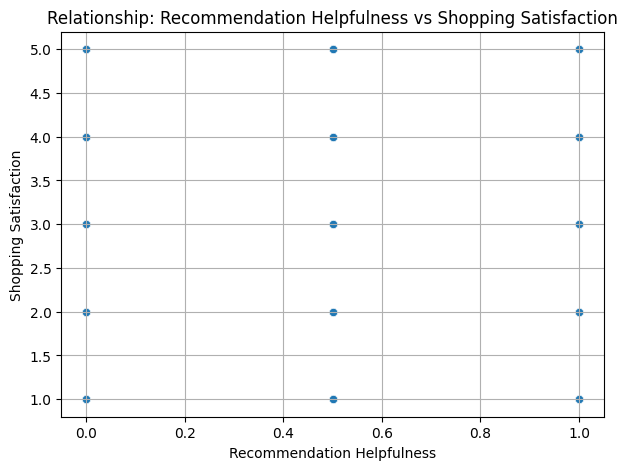

In [65]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=clean_df,x="Recommendation_Helpfulness",y="Shopping_Satisfaction")
plt.title("Relationship: Recommendation Helpfulness vs Shopping Satisfaction")
plt.xlabel("Recommendation Helpfulness")
plt.ylabel("Shopping Satisfaction")
plt.grid(True)
plt.show()

In [66]:
#Evaluate how review reliability and helpfulness impact overall ratings.

In [67]:
reliability_impact = df.groupby('Review_Reliability')['Rating_Accuracy'].mean().sort_values(ascending=False).to_frame().round(3)
print("Mean Rating Accuracy by Review Reliability:")
print(reliability_impact)

Mean Rating Accuracy by Review Reliability:
                    Rating_Accuracy
Review_Reliability                 
Moderately                    3.205
Heavily                       3.024
Rarely                        2.920
Occasionally                  2.857
Never                         2.843


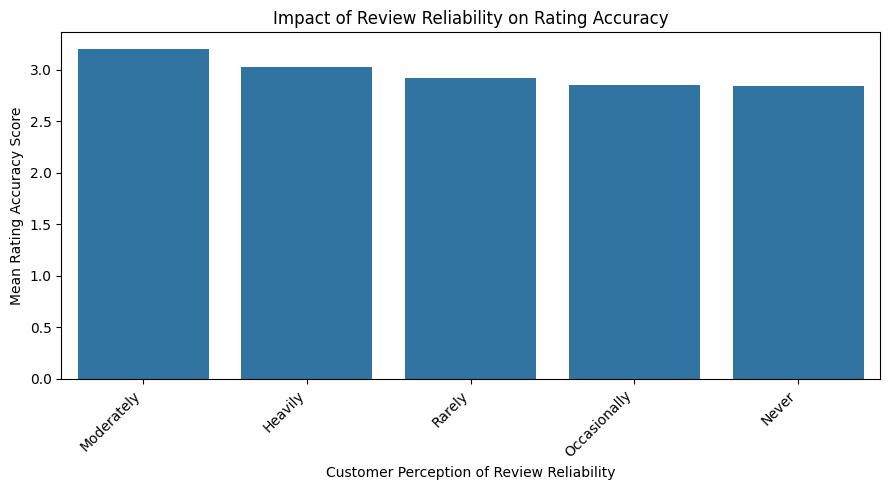

In [68]:
reliability_impact_df = reliability_impact.reset_index()
plt.figure(figsize=(9, 5))
sns.barplot(x='Review_Reliability', y='Rating_Accuracy', data=reliability_impact_df)
plt.title('Impact of Review Reliability on Rating Accuracy')
plt.xlabel('Customer Perception of Review Reliability')
plt.ylabel('Mean Rating Accuracy Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [69]:
helpfulness_impact = df.groupby('Review_Helpfulness')['Rating_Accuracy'].mean().sort_values(ascending=False).to_frame().round(3)
print("Mean Rating Accuracy by Review Helpfulness:")
print(helpfulness_impact)

Mean Rating Accuracy by Review Helpfulness:
                    Rating_Accuracy
Review_Helpfulness                 
No                            3.035
Yes                           2.965
Sometimes                     2.898


Text(0, 0.5, 'Mean Rating Accuracy')

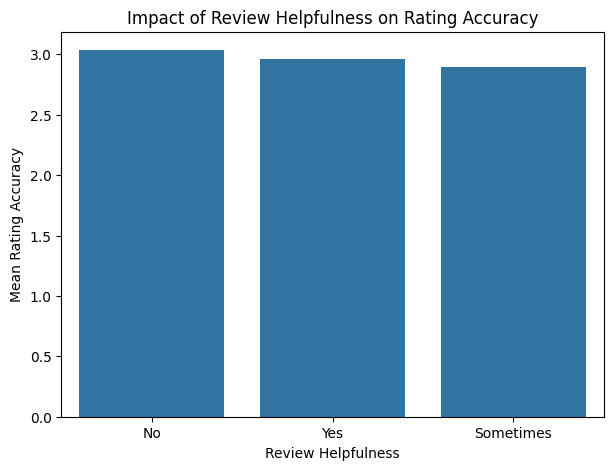

In [70]:
helpfulness_impact_df = helpfulness_impact.reset_index()
plt.figure(figsize=(7, 5))
sns.barplot(x='Review_Helpfulness', y='Rating_Accuracy', data=helpfulness_impact_df)
plt.title('Impact of Review Helpfulness on Rating Accuracy')
plt.xlabel('Review Helpfulness')
plt.ylabel('Mean Rating Accuracy')

In [71]:
#Identify trends in how often customers engage with or trust personalized recommendations.

In [72]:
rec_engagement = df.iloc[:, 5].value_counts(normalize=True).mul(100).round(1).to_frame(name='Percentage')
print("Personalized Recommendation Engagement Trends (%)")
print(rec_engagement)

Personalized Recommendation Engagement Trends (%)
                                       Percentage
Personalized_Recommendation_Frequency            
Yes                                          34.8
No                                           34.0
Sometimes                                    31.2


Text(0, 0.5, '% of Customers')

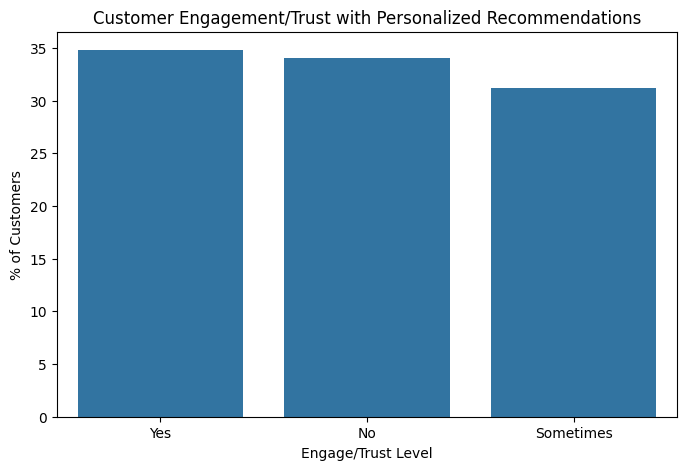

In [73]:
rec_engagement_df = rec_engagement.reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='Personalized_Recommendation_Frequency', y='Percentage', data=rec_engagement_df)
plt.title('Customer Engagement/Trust with Personalized Recommendations')
plt.xlabel('Engage/Trust Level')
plt.ylabel('% of Customers')

In [74]:
#Suggest actionable insights for improving Amazon’s recommendation system

In [75]:
insights = []

def safe_corr(df, c1, c2):
    return df[[c1, c2]].dropna().corr().iloc[0, 1] if c1 in df and c2 in df else 0

corr1 = safe_corr(df, "Recommendation_Helpfulness", "Shopping_Satisfaction")
corr2 = safe_corr(df, "Review_Reliability", "Overall_Rating")

if corr1 > 0.3:
    insights.append("Helpful recommendations strongly increase shopping satisfaction.")

if corr2 > 0.3:
    insights.append("Reliable and consistent reviews have a strong positive impact on overall ratings.")

if "Trust_in_Recommendations" in df.columns:
    insights.append("Customers who trust recommendations tend to show higher satisfaction scores.")

if "Recommendation_Helpfulness" in df.columns and df["Recommendation_Helpfulness"].mean() < 3:
    insights.append("Low recommendation helpfulness indicates a need to personalize recommendations better.")

print("\n".join(insights) if insights else "No strong insights detected")


Low recommendation helpfulness indicates a need to personalize recommendations better.


In [76]:
#Task 5: Visualization and Reporting

In [77]:
import plotly.express as px

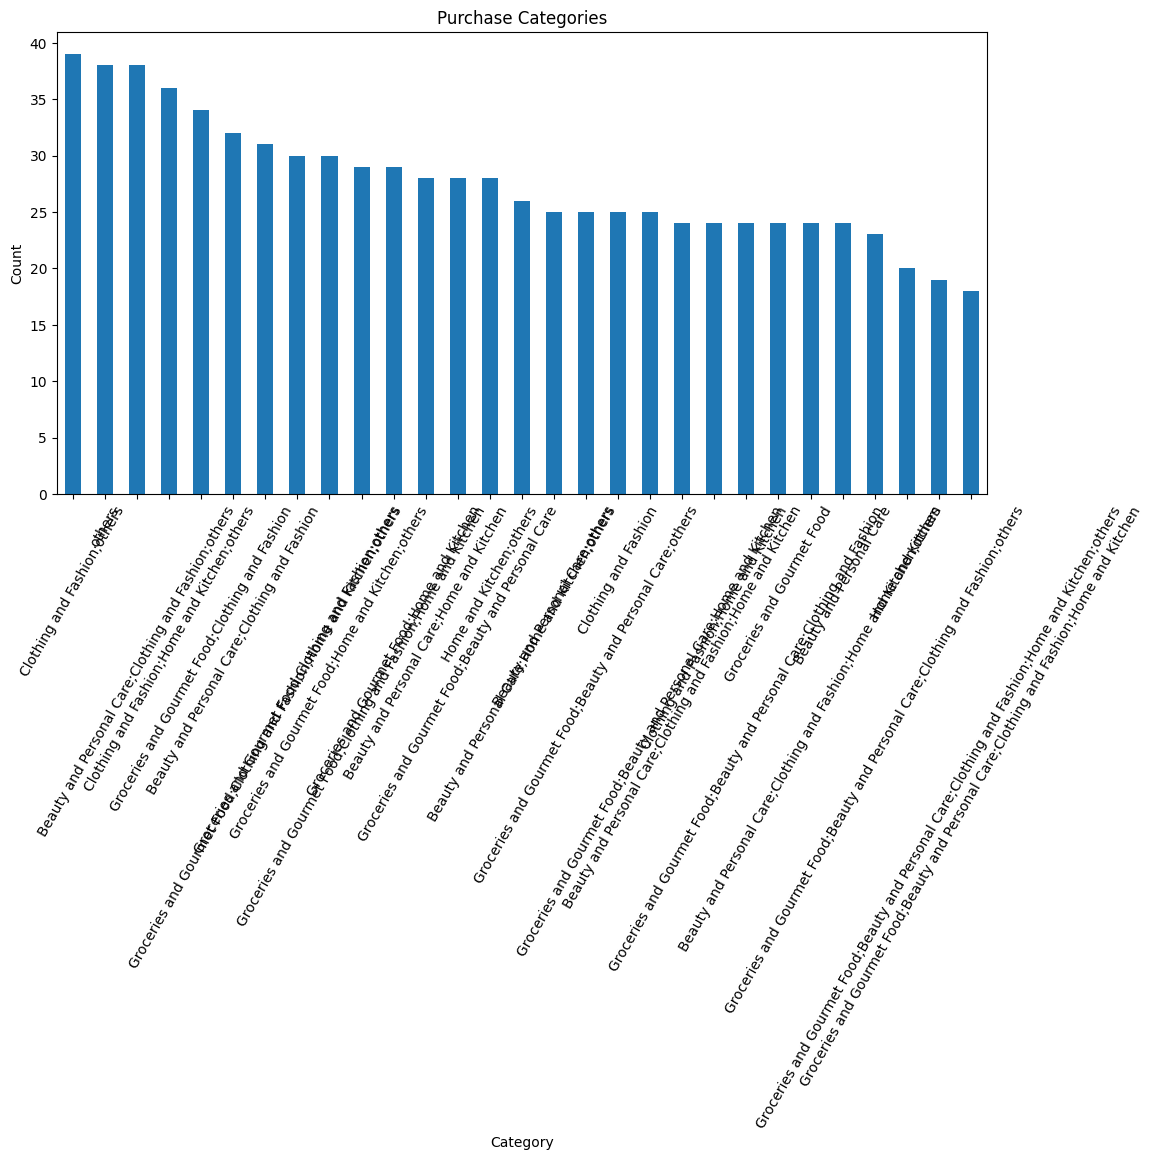

In [78]:
plt.figure(figsize=(12,6))
df['Purchase_Categories'].value_counts().plot(kind='bar')
plt.title('Purchase Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=60)
plt.show()

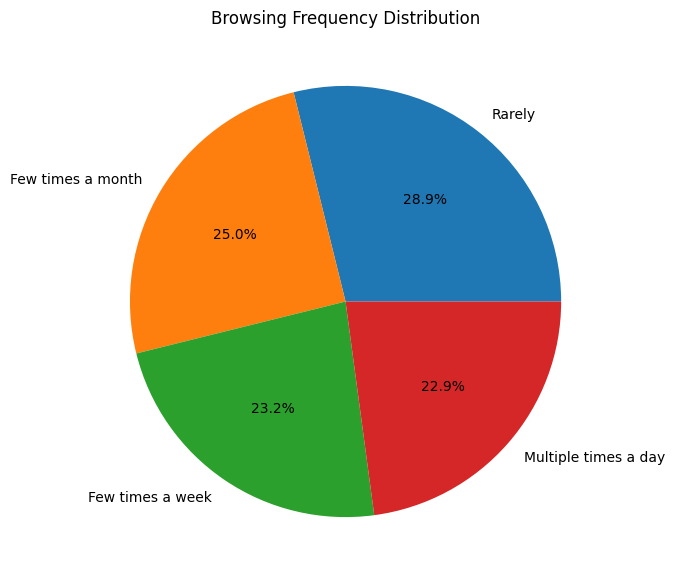

In [79]:
plt.figure(figsize=(7,7))
df['Browsing_Frequency'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Browsing Frequency Distribution')
plt.ylabel('')
plt.show()

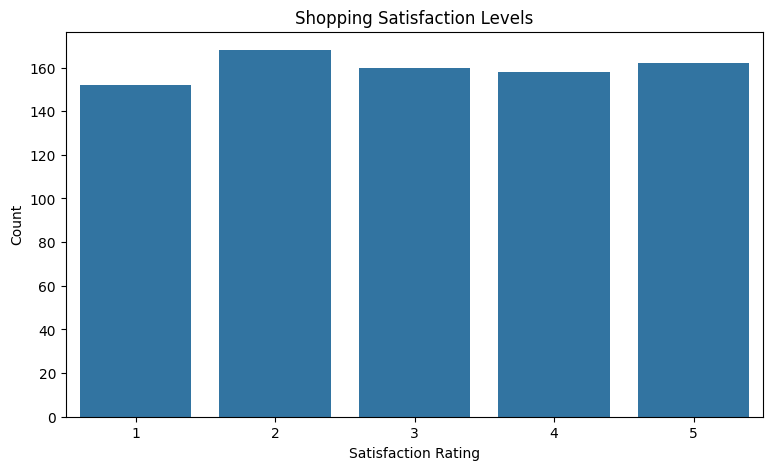

In [80]:
plt.figure(figsize=(9,5))
sns.countplot(x='Shopping_Satisfaction', data=df)
plt.title('Shopping Satisfaction Levels')
plt.xlabel('Satisfaction Rating')
plt.ylabel('Count')
plt.show()

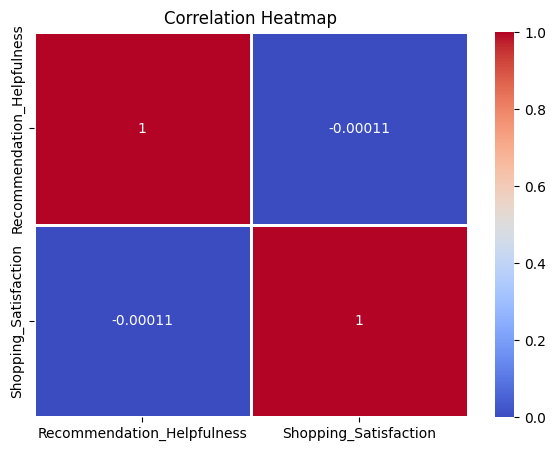

In [81]:
plt.figure(figsize=(7,5))
sns.heatmap(df[['Recommendation_Helpfulness', 'Shopping_Satisfaction']].corr(),
            annot=True, cmap='coolwarm', linewidths=1)
plt.title('Correlation Heatmap')
plt.show()

In [82]:
#Summarize findings in a clear and visually appealing dashboard or report format.

/tmp/ipython-input-897076007.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Browsing_Frequency",palette="viridis", ax=ax[0, 1])
/tmp/ipython-input-897076007.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Shopping_Satisfaction",order=sorted(df["Shopping_Satisfaction"].unique()),palette="magma", ax=ax[0, 2])


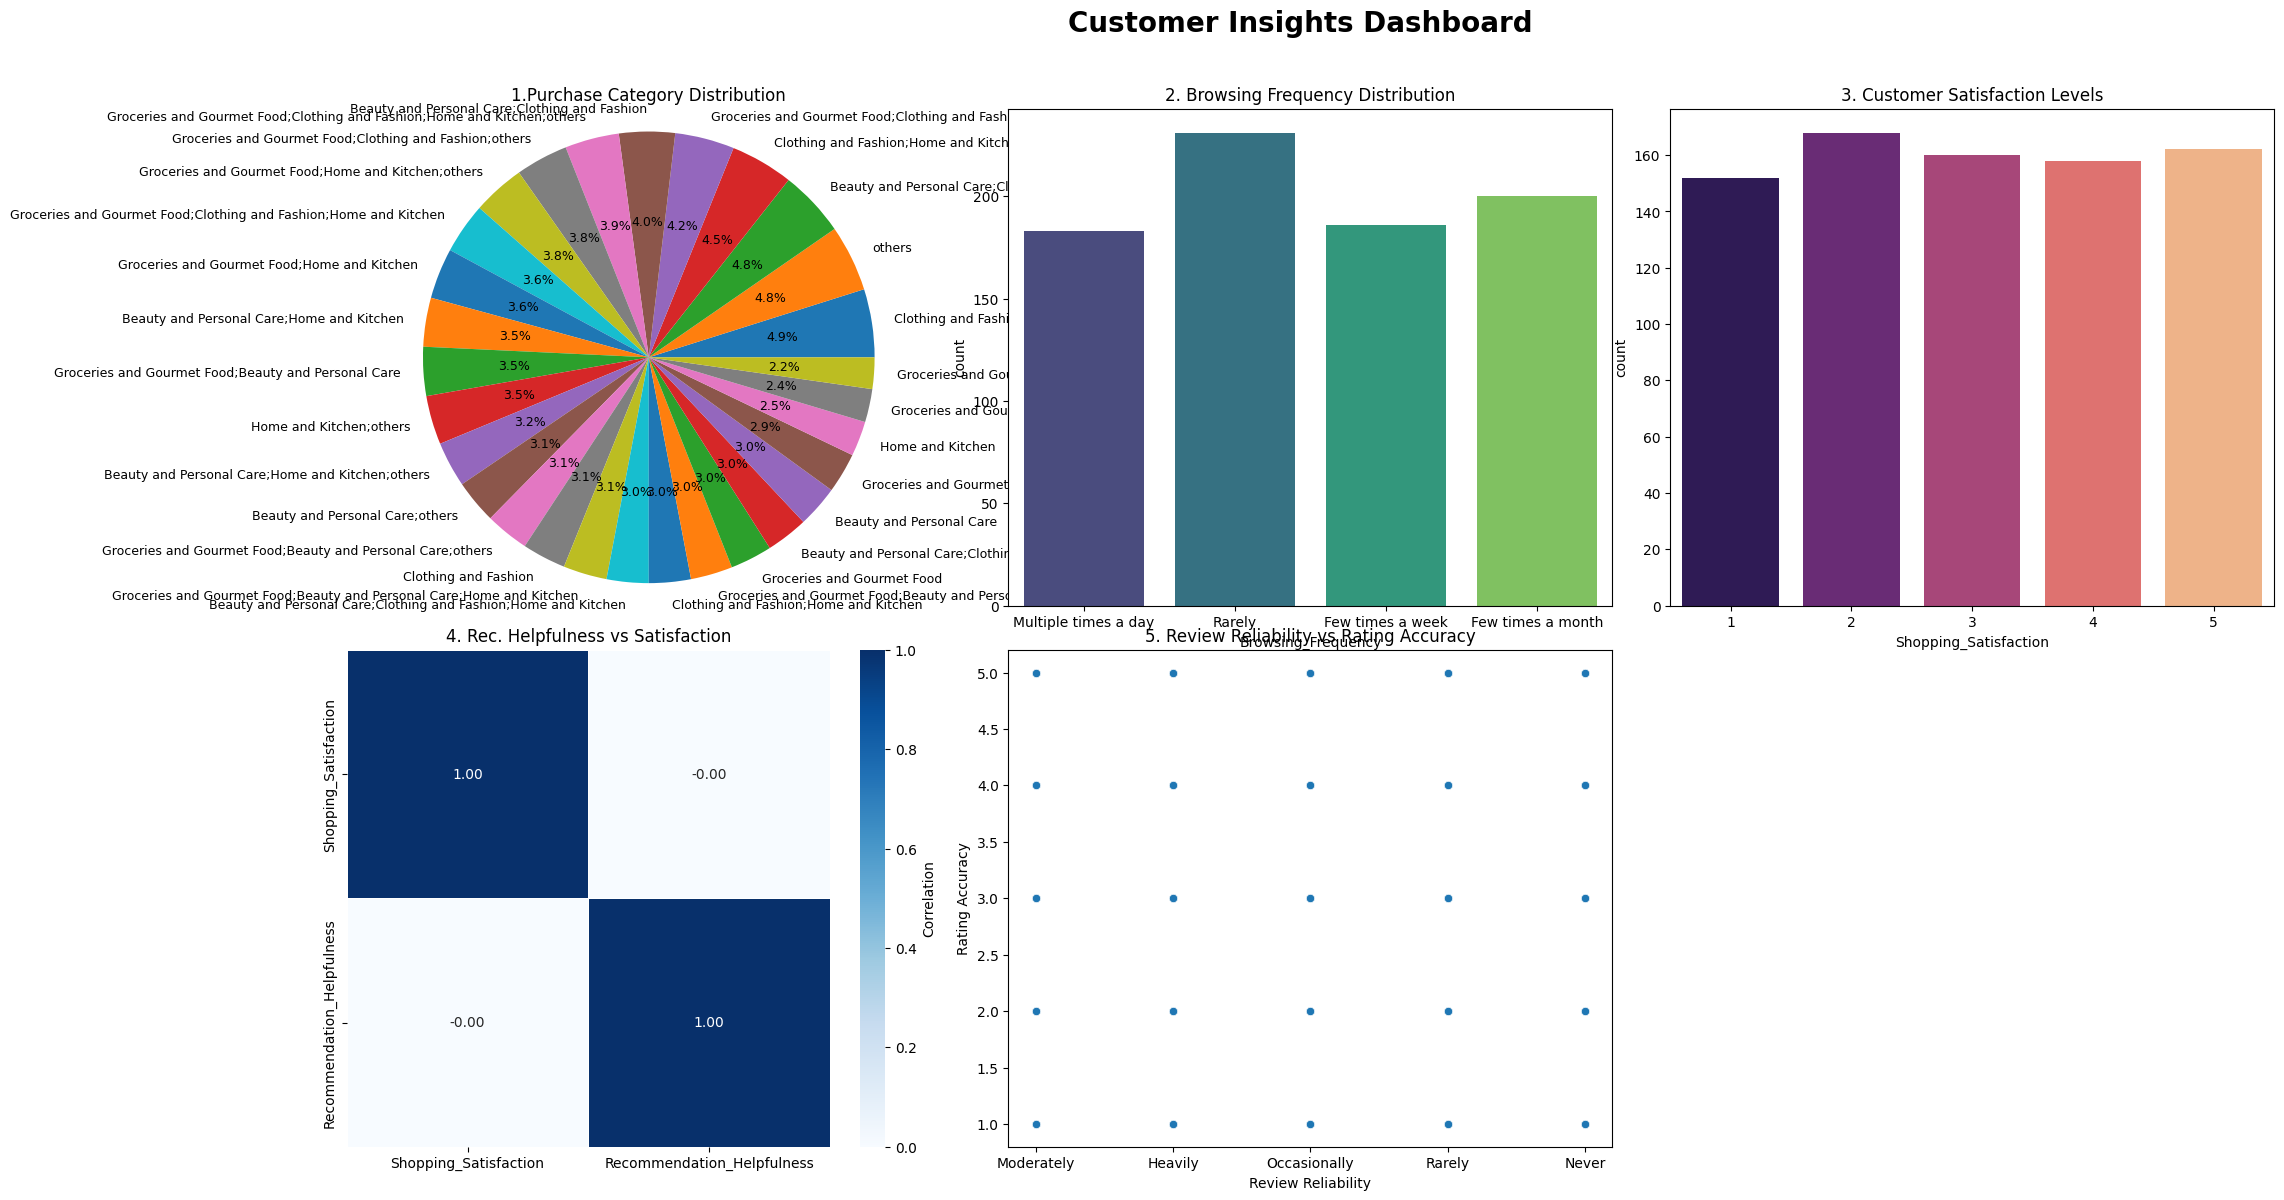

In [83]:
fig, ax = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle("Customer Insights Dashboard",fontsize=20, fontweight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.95])


cat_counts = df["Purchase_Categories"].value_counts()
ax[0, 0].pie(cat_counts, labels=cat_counts.index,autopct="%1.1f%%", textprops={"fontsize": 9})
ax[0, 0].set_title("1.Purchase Category Distribution")
ax[0, 0].axis("equal")


sns.countplot(data=df, x="Browsing_Frequency",palette="viridis", ax=ax[0, 1])
ax[0, 1].set_title("2. Browsing Frequency Distribution")


sns.countplot(data=df, x="Shopping_Satisfaction",order=sorted(df["Shopping_Satisfaction"].unique()),palette="magma", ax=ax[0, 2])
ax[0, 2].set_title("3. Customer Satisfaction Levels")


corr = df[["Shopping_Satisfaction","Recommendation_Helpfulness"]].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues",linewidths=0.5, cbar_kws={"label": "Correlation"},ax=ax[1, 0])
ax[1, 0].set_title("4. Rec. Helpfulness vs Satisfaction")


sns.scatterplot(data=df,x="Review_Reliability",y="Rating_Accuracy", ax=ax[1, 1])
ax[1, 1].set_title("5. Review Reliability vs Rating Accuracy")
ax[1, 1].set_xlabel("Review Reliability")
ax[1, 1].set_ylabel("Rating Accuracy")


ax[1, 2].axis("off")

plt.show()

In [84]:
print("Summary of Key Findings")

top_cat = cat_counts.idxmax()
top_cat_pct = cat_counts.max() / cat_counts.sum() * 100
print("1. Purchase Categories:** {top_cat} is the largest category, accounting for {top_cat_pct:.1f}% of purchases.")

top_browsing = ' or '.join(df["Browsing_Frequency"].value_counts().head(2).index)
print("2. Browsing Frequency:** The majority of customers browse {top_browsing}.")

mode_sat = df["Shopping_Satisfaction"].mode()[0]
print("3. Satisfaction Levels:** The mode satisfaction level is {mode_sat}, suggesting a general level of customer happiness.")

corr_val = corr.loc["Shopping_Satisfaction", "Recommendation_Helpfulness"]
strength = "strong" if abs(corr_val) > 0.5 else "moderate" if abs(corr_val) > 0.2 else "weak"
direction = "positive" if corr_val > 0 else "negative"

print("4. Recommendation Correlation (Heatmap):** Analysis of the heatmap suggests:")

print(" There appears to be a {strength} {direction} relationship (correlation: {corr_val:.2f}) between recommendation helpfulness and shopping satisfaction.")

print("Higher recommendation helpfulness does not necessarily mean higher satisfaction, and vice versa, as correlation is very low.")

Summary of Key Findings
1. Purchase Categories:** {top_cat} is the largest category, accounting for {top_cat_pct:.1f}% of purchases.
2. Browsing Frequency:** The majority of customers browse {top_browsing}.
3. Satisfaction Levels:** The mode satisfaction level is {mode_sat}, suggesting a general level of customer happiness.
4. Recommendation Correlation (Heatmap):** Analysis of the heatmap suggests:
 There appears to be a {strength} {direction} relationship (correlation: {corr_val:.2f}) between recommendation helpfulness and shopping satisfaction.
Higher recommendation helpfulness does not necessarily mean higher satisfaction, and vice versa, as correlation is very low.
